# Unit 5 - Financial Planning

In [91]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [92]:
# Load .env enviroment variables
load_dotenv(find_dotenv())

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [93]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [94]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [95]:
# Fetch current BTC price
btc_current=requests.get(btc_url)


# Fetch current ETH price
eth_current=requests.get(eth_url)

# Compute current value of my crpto
import json
btc_data=btc_current.json()
btc_value=my_btc*btc_data['data']['1']['quotes']['CAD']['price']
eth_data=eth_current.json()
eth_value=my_eth*eth_data['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $48689.56
The current value of your 5.3 ETH is $16172.78


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [96]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [97]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api_object=tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='V2')

In [98]:
type(alpaca_api_key)

str

In [99]:
# Format current date as ISO format
start_date=pd.Timestamp("2020-06-06",tz="America/New_york").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
api=api_object.get_barset(tickers,timeframe,start=start_date,limit=1000).df

# Preview DataFrame
api.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-06-08 00:00:00-04:00  116.81  117.1092  116.7501  117.020  15737748   
2020-06-09 00:00:00-04:00  117.31  117.3300  117.1900  117.190  10803958   
2020-06-10 00:00:00-04:00  117.25  117.6800  117.1850  117.665   9007660   
2020-06-11 00:00:00-04:00  117.73  117.8000  117.4350  117.460  11776174   
2020-06-12 00:00:00-04:00  117.60  117.7000  117.5700  117.640   1790030   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-06-08 00:00:00-04:00  320.22  323.4100  319.6300  323.25   64329574  
2020-06-09 00:00:00-04:00  320.30  323.2849  319.3600  320.81   67642220  
2020-06-10 00:00:00-04:00  321.42  322.3900  318.2209  319.01   84064921  
2020-06-11 00:00:00-04:00  311.46  312.1500  300.0100  300.62  182628939  
2020-06-12 00:00:00-04:00  308.24  309.0800  298.6000  304.28  168502612

In [112]:
# Pick AGG and SPY close prices
agg_close_price=api['AGG']['close']['2021-01-14']
spy_close_price=api['SPY']['close']['2021-01-14']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.15
Current SPY closing price: $378.45


In [101]:
# Compute the current value of shares
my_agg_value=my_agg*agg_close_price
my_spy_value=my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18922.50
The current value of your 200 AGG shares is $23430.00


### Savings Health Analysis

In [102]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
#consolidated=pd.concat([my_spy_value,my_agg_value,monthly_value],axis'columns',join'inner')
#consolidated.head()

# Create savings DataFrame
crypto_value=btc_value+eth_value
shares_value=my_spy_value+my_agg_value
df={'amount':{
    "crypto":crypto_value,
    "shares":shares_value
    }
   }
df_savings=pd.DataFrame(df)

# Display savings DataFrame
display(df_savings)

,amount
crypto,64862.339083
shares,42352.500000


<AxesSubplot:title={'center':'Compostion of Customer Savings'}, ylabel='amount'>

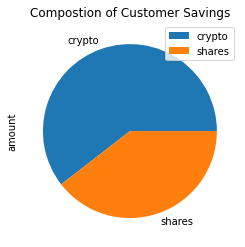

In [105]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title="Compostion of Customer Savings")

In [106]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=df['amount']['crypto']+df['amount']['shares']

# Validate saving health
if total_savings>emergency_fund:
    print("Congratulations!You have enough money in your emergency fund")
elif total_savings==emergency_fund:
    print("Conratulations!You have reached your financial goals")
else:
    print(f"You are ${amount_to_goal:2f}away from your goal. You're almost there. Keep going.")


Congratulations!You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [107]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [108]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data=api_object.get_barset(tickers,timeframe,start=start_date,end=end_date,limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [109]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_even_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*30)

In [110]:
# Printing the simulation input data
monte_carlo_even_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [111]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998342,0.991204,1.000544,1.006457,1.004992,1.009526,1.005913,0.999730,1.009239,1.000367,...,1.008664,0.993055,1.022520,0.993984,1.000353,0.984252,0.997110,1.008081,1.002681,1.004463
2,0.986008,0.988228,1.006544,1.018388,1.006893,1.012096,1.008728,0.996727,1.003767,0.994628,...,1.013831,0.991714,1.043116,0.996984,0.998946,0.973874,1.000066,1.009526,1.005926,0.990695
3,0.986259,0.993103,1.003655,1.040759,1.014678,1.000541,1.016443,0.985299,1.011266,0.979861,...,1.002343,1.009010,1.040638,0.981285,1.005337,0.970880,1.003403,1.006739,1.005732,0.991641
4,0.985717,0.987891,1.009531,1.035931,1.003684,1.008715,1.022168,0.986045,1.004839,0.994912,...,0.996847,1.009711,1.041547,0.986916,0.995622,0.963480,1.011940,1.005142,0.989223,0.995061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.866102,12.403076,45.849789,13.495066,35.737681,7.893729,22.102996,8.363977,19.515864,36.410810,...,23.965221,23.529231,7.376726,8.943320,23.232818,6.543008,9.184118,23.193264,22.106244,9.097430
7557,14.887819,12.380510,45.886858,13.428865,36.140566,7.952173,22.048172,8.505013,19.763570,36.323679,...,24.219088,23.470772,7.364973,8.903103,23.059368,6.548301,9.091716,23.211515,22.168091,9.104956
7558,14.764256,12.543400,45.212267,13.409997,36.381713,8.001838,21.800841,8.555221,19.712340,35.636416,...,24.329474,23.312539,7.420120,8.865562,22.785534,6.595632,9.091054,23.048085,22.123109,9.085440
7559,14.811261,12.660362,45.690477,13.430552,36.612076,8.098458,21.981048,8.607347,19.665792,35.927994,...,24.092498,23.022627,7.394004,8.808687,22.816463,6.585357,8.989422,22.736143,21.970802,9.141454


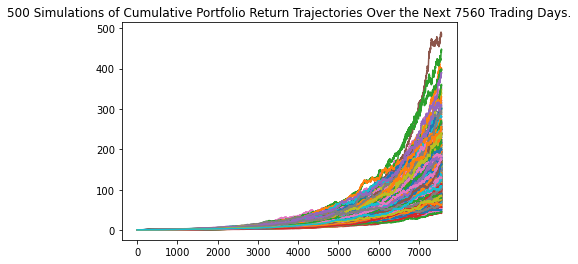

In [62]:
# Plot simulation outcomes
line_plot=monte_carlo_even_dist.plot_simulation()

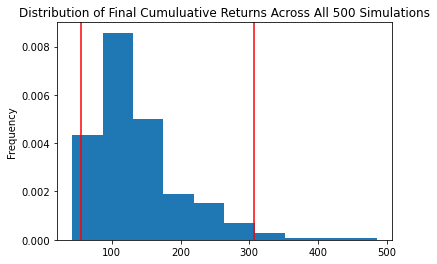

In [63]:
# Plot probability distribution and confidence intervals
dist_plot=monte_carlo_even_dist.plot_distribution()

### Retirement Analysis

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats=monte_carlo_even_dist.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           500.000000
mean            138.788922
std              67.038399
min              42.182828
25%              91.601372
50%             121.472402
75%             166.375528
max             485.417328
95% CI Lower     55.383973
95% CI Upper    306.366696
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [67]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(sum_stats[8]*initial_investment,2)
ci_upper=round(sum_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1107679.46 and $6127333.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [68]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(sum_stats[8]*initial_investment,2)
ci_upper=round(sum_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1661519.19 and $9191000.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [70]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_five_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*5)

In [71]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_five_dist.portfolio_data.head()
monte_carlo_five_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008509,0.994038,0.998561,1.000756,0.998683,1.003387,1.006964,1.005727,0.996703,1.010655,...,0.997090,0.997322,0.995284,1.004726,1.000278,1.012168,0.994993,1.000084,1.002370,1.007130
2,0.996580,0.999301,1.007702,1.011140,1.001069,1.003360,1.012803,0.996176,0.991657,1.014666,...,1.003511,1.006084,0.994644,0.998952,1.000844,1.014467,1.001814,0.991698,1.003007,1.011555
3,0.998002,0.997345,1.001824,1.005607,1.001458,1.000163,1.013666,0.995021,1.000011,1.017094,...,0.996386,0.995628,0.997082,0.992409,0.995173,1.011237,0.994103,0.985260,0.996754,1.007910
4,0.998872,1.004895,1.012129,1.010710,1.014325,1.001907,1.016816,0.993543,1.005773,1.016337,...,1.000412,0.994114,0.996309,0.991016,0.992512,1.010566,0.992334,0.983991,1.000100,1.006591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.327996,2.429022,2.805258,2.084966,2.428872,2.243765,2.660510,2.980691,2.384856,3.023434,...,2.281511,3.487686,1.783850,1.979823,2.659074,2.535427,3.063843,3.088029,2.320915,2.598369
1257,2.338839,2.430447,2.799123,2.082445,2.429219,2.234346,2.649792,2.967984,2.389552,3.058420,...,2.255545,3.462029,1.791135,1.957066,2.668575,2.533541,3.071899,3.077620,2.307679,2.581841
1258,2.347125,2.403945,2.790946,2.062397,2.439520,2.263598,2.648091,2.987932,2.390154,3.036257,...,2.243924,3.453093,1.798213,1.965107,2.694534,2.518112,3.090110,3.065987,2.305751,2.584280
1259,2.327397,2.408626,2.783720,2.070682,2.447787,2.265280,2.630582,2.965940,2.404466,3.053252,...,2.262663,3.454716,1.807812,1.970456,2.714474,2.496974,3.083034,3.104158,2.301226,2.564107


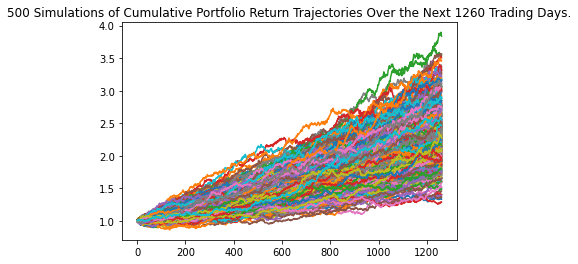

In [72]:
# Plot simulation outcomes
line_plot=monte_carlo_five_dist.plot_simulation()

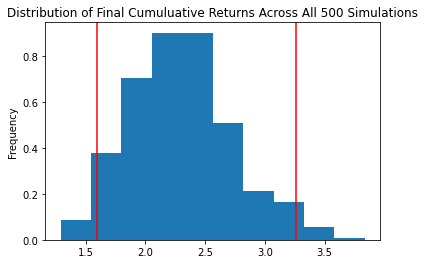

In [73]:
# Plot probability distribution and confidence intervals
dist_plot=monte_carlo_five_dist.plot_distribution()

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats=monte_carlo_five_dist.summarize_cumulative_return()
# Print summary statistics
print(summary_stats)

count           500.000000
mean              2.304722
std               0.434366
min               1.289214
25%               1.992642
50%               2.270773
75%               2.554039
max               3.837535
95% CI Lower      1.596119
95% CI Upper      3.264207
Name: 1260, dtype: float64


In [77]:
# Set initial investment
init_inv=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(sum_stats[8]*init_inv,2)
ci_upper_five=round(sum_stats[9]*init_inv,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $95767.16 and $195852.43


### Ten Years Retirement Option

In [79]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_ten_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*10)

In [80]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_ten_dist.portfolio_data.head()
monte_carlo_ten_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012201,0.999923,0.997565,1.004043,0.998015,0.999215,1.017990,0.993178,0.993686,1.009258,...,1.004457,0.993089,1.004469,0.999910,0.998089,1.006248,1.001295,1.008207,0.996697,1.003155
2,1.012503,0.999222,1.004158,1.003964,1.004540,1.001246,1.026757,0.997779,0.994932,1.003446,...,1.000493,0.989476,0.997099,0.991385,0.992019,1.001962,0.997603,0.999653,0.998047,1.003749
3,1.013495,1.001962,0.998799,1.003729,1.009081,0.992206,1.025756,1.008284,0.993783,1.007920,...,1.001409,0.983898,0.990093,0.995376,0.986631,1.002182,0.992735,1.003575,1.001404,0.999493
4,1.018454,1.002855,0.993899,0.999874,1.021132,0.996123,1.022268,1.005392,0.993371,1.011487,...,0.997909,0.979466,0.993993,1.004824,0.989021,0.998644,0.996774,1.010516,1.003515,1.001106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.277360,4.257136,3.643538,5.320020,7.086613,5.133905,3.897006,6.735326,5.440844,2.770350,...,4.458105,4.558837,4.042811,3.212215,2.999240,7.467746,5.927682,4.338974,6.303810,3.656250
2517,4.298288,4.229552,3.688565,5.315516,7.090684,5.154192,3.897459,6.728692,5.446126,2.781157,...,4.467787,4.607839,4.026756,3.216331,3.015053,7.503770,5.958075,4.327285,6.320114,3.660396
2518,4.325301,4.278356,3.712388,5.331894,7.040545,5.146117,3.891611,6.726839,5.477560,2.780364,...,4.450190,4.604762,3.998613,3.221081,3.006289,7.440173,5.959175,4.339346,6.301908,3.665162
2519,4.329647,4.301189,3.711851,5.346791,7.046238,5.167295,3.887280,6.709447,5.453701,2.787267,...,4.492995,4.629235,4.028641,3.216492,3.041276,7.505327,5.983153,4.307955,6.287548,3.671275


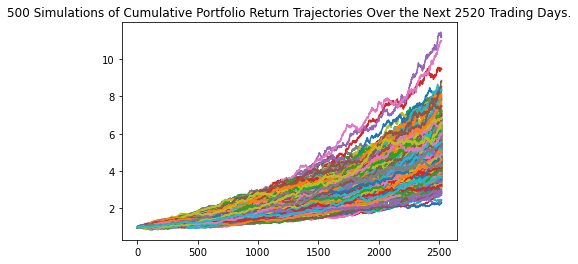

In [81]:
# Plot simulation outcomes
line_plot=monte_carlo_ten_dist.plot_simulation()

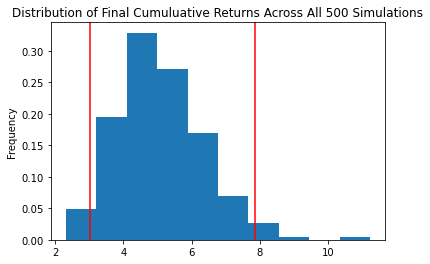

In [82]:
# Plot probability distribution and confidence intervals
dist_plot=monte_carlo_ten_dist.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics=monte_carlo_five_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean              2.304722
std               0.434366
min               1.289214
25%               1.992642
50%               2.270773
75%               2.554039
max               3.837535
95% CI Lower      1.596119
95% CI Upper      3.264207
Name: 1260, dtype: float64


In [85]:
# Set initial investment
initial_inv=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(sum_stats[8]*initial_inv,2)
ci_upper_ten=round(sum_stats[9]*initial_inv,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $95767.16 and $195852.43
